#SF crime data analysis and modeling

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv")
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

path,name,size
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,550945238


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")


PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null,86
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null,53
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,null,null,null,5,null,9,1,null,null,5,null,38


In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
18030800164070,180308001,64070,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,04/25/2018,05:00,BAYVIEW,NONE,1400 Block of THOMAS AV,-122.38854283127222,37.72878928885484,POINT (-122.38854283127222 37.72878928885484),86,2,9,1,10,3,8,58,1,null,null,null,null,null,null,2,null,null,null,null,86
18023216504170,180232165,04170,ASSAULT,FALSE IMPRISONMENT,Saturday,03/24/2018,07:00,MISSION,NONE,MISSION ST / 20TH ST,-122.41905269434928,37.75863240515618,POINT (-122.41905269434928 37.75863240515618),53,3,2,20,2,4,7,28859,19,13,null,15,3,15,null,2,null,null,3,null,53
16028516271000,160285162,71000,NON-CRIMINAL,LOST PROPERTY,Tuesday,03/01/2016,00:01,MISSION,NONE,2200 Block of MARKET ST,-122.43195768519577,37.76493571896795,POINT (-122.43195768519577 37.76493571896795),38,3,5,5,15,4,5,28862,3,null,null,null,5,null,9,1,null,null,5,null,38


In [0]:
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


<Figure size 432x288 with 0 Axes>

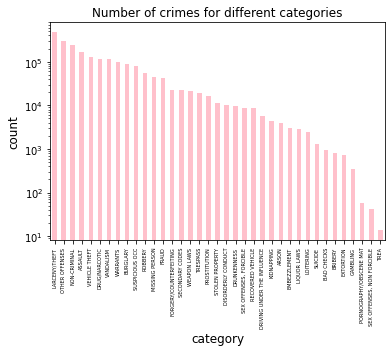

In [0]:
crimes_pd_df = crimeCategory.toPandas()
plt.figure()
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
ax = crimes_pd_df.plot(kind = 'bar',x = 'category',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('category',fontsize = 12)
plt.xticks(fontsize=5, rotation=90)
plt.title('Number of crimes for different categories')
display()

In [0]:
crimeDistrict = spark.sql("SELECT  PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


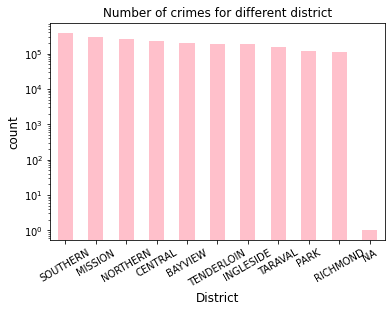

In [0]:
crimeperdis = crimeDistrict.toPandas()
ax = crimeperdis.plot(kind = 'bar',x = 'PdDistrict',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('District',fontsize = 12)
plt.xticks(fontsize=10, rotation=30)
plt.title('Number of crimes for different district')
display()

San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each.             So we assume SF downtown's spacialrange: X (-122.4213,-122.4313), Y(37.7540,37.7740)

In [0]:
task3_result = spark.sql("""
                      with Sunday_dt_crime as(
                      select substring(Date,1,5) as Date,
                             substring(Date,7) as Year
                      from sf_crime
                      where (DayOfWeek = 'Sunday'
                             and -122.423671 <= X
                             and X <= 122.412497
                             and 37.773510 <= Y
                             and Y <= 37.782137)
                             )
                             
                      select Year, Date, COUNT(*) as Count
                      from Sunday_dt_crime
                      group by Year, Date
                      order by Year, Date
                      """)
display(task3_result)

Year,Date,Count
2003,01/05,28
2003,01/12,33
2003,01/19,19
2003,01/26,32
2003,02/02,44
2003,02/09,46
2003,02/16,50
2003,02/23,48
2003,03/02,40
2003,03/09,49


In [0]:
crimeNumber = spark.sql("select substring(Date,1,2) as Month, substring(Date, 7,4) as Year, COUNT(*) AS Count from sf_crime group by 1,2 having Year in (2015,2016,2017,2018) order by 1,2")
display(crimeNumber)


##Althogh the crime situation stays almost the same during 2015-2017, it seems that there is a obvious drop in year 2018. So now I am going to dig into the crime category to find which aspect leads to this change. 

Month,Year,Count
01,2015,13181
01,2016,12532
01,2017,12687
01,2018,11667
02,2015,11882
02,2016,11743
02,2017,11780
02,2018,9565
03,2015,13463
03,2016,11950


In [0]:
crimeNumber = spark.sql("""
                        select COUNT(*) AS Count, substring(Date,1,2) as Month, substring(Date, 7,4) as Year, category 
                        from sf_crime group by 4,3,2 
                        having Year in (2015,2016,2017,2018) and (month = 01 or month = 02 or month = 03 or month =04)
                        order by 4 DESC
                        """) 
display(crimeNumber)


##Now we can see, the reduction in 2018 is largely due to kidnapping, missing person, other offenses and weapon laws.

Count,Month,Year,category
144,03,2016,WEAPON LAWS
138,03,2018,WEAPON LAWS
130,02,2018,WEAPON LAWS
142,01,2015,WEAPON LAWS
111,04,2016,WEAPON LAWS
128,04,2017,WEAPON LAWS
127,02,2016,WEAPON LAWS
103,01,2016,WEAPON LAWS
145,01,2017,WEAPON LAWS
138,02,2015,WEAPON LAWS


In [0]:
monthCrime = spark.sql("select substring(Date,1,2) as Month, substring(Date, 7,4) as Year, COUNT(*) AS Count from sf_crime group by 1,2 having Year in (2015,2016,2017) order by 1")
display(monthCrime)

##Through this, we can come with the conclusion that teh crime situation from 2015-2017 remains stable without big changes.

Month,Year,Count
01,2017,12687
01,2015,13181
01,2016,12532
02,2015,11882
02,2017,11780
02,2016,11743
03,2017,13250
03,2015,13463
03,2016,11950
04,2017,12452


In [0]:
crimeDistrict = spark.sql("""
                        select COUNT(*) AS Count, substring(Date, 7,4) as Year, PdDistrict 
                        from sf_crime 
                        group by 3,2 
                        having year in (2017,2016,2016,2014,2013)
                        order by 1 DESC
                        """) 
display(crimeDistrict)

## Now we get the most 'dangerous' place in SFC 

Count,Year,PdDistrict
28618,2013,SOUTHERN
28224,2014,SOUTHERN
27859,2016,SOUTHERN
27800,2017,SOUTHERN
21211,2017,MISSION
20687,2017,NORTHERN
20415,2013,MISSION
19768,2016,NORTHERN
19064,2016,MISSION
18638,2017,CENTRAL


##business sight
* It is possible that there are some social well-being or benefit or good policy released to help people's life so that the amount of crime decreases in short-term
* If the observation that the amount of crime in 2018 decreases dramatically from Jan to May is correct, rather than missing records, then it is possible that some polices released to control the amount of crime and the regions in the report will be safer than before.
* From the historical data, several areas with relatively high crime rate, including SOUTHRNM, MISSION, NORTHERN, etc, with which the travel companies or event organizers can choose a safe place as their target.

In [0]:
q5_result = spark.sql("""
                      select substring(Time,1,2) as Hour,
                             substring(Date,1,5) as Date_in_year,
                             count(*) as Count
                      from sf_crime
                      where Date like '12/25/%' or Date like '01/01/%' or Date like '12/31/%'
                      group by Date_in_year, Hour
                      order by Date_in_year Desc, Hour
                      """)
display(q5_result)

Hour,Date_in_year,Count
00,12/31,277
01,12/31,160
02,12/31,137
03,12/31,70
04,12/31,55
05,12/31,59
06,12/31,72
07,12/31,98
08,12/31,177
09,12/31,171


####Conclusions
* During sleeping time(1:00-7:00), crimes are much less than other time.
* In Christmas, crimes would concentrate in lunch time and Christmas Eve.
* There shows an incredibly sharp increase of crimes in the New Year countdown hours. So in fact, for safety concern, it's highly not recommended for travelers to go out in New Year hours.

* find top-3 dangerous districts 
* 
* advice to distribute the police based on your analysis results

In [0]:
step_1 = spark.sql( """
                      SELECT PdDistrict, COUNT(*) as Count
                      FROM sf_crime
                      GROUP BY 1
                      ORDER BY 2 DESC
                      LIMIT 3        
                      """ )
display(step_1)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
crimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) as Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
crimeDistrict.createOrReplaceTempView("crimeDistrict")

Dist_rank = spark.sql("""
                      select PdDistrict, Count as Crime_Number,
                             rank() over(order by Count desc) as Rank
                      from crimeDistrict
                      """)
Dist_rank.createOrReplaceTempView("Dist_rank")

q6_s1_result = spark.sql("""
                       select PdDistrict, Crime_Number
                       from Dist_rank
                       where Rank <= 3
                       """)
q6_s1_result.createOrReplaceTempView("q6_s1_result")

display(q6_s1_result)

PdDistrict,Crime_Number
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
Top3_Dist = spark.sql("""
                      select sf_crime.PdDistrict, sf_crime.category, sf_crime.Time
                      from sf_crime
                      inner join q6_s1_result on sf_crime.PdDistrict = q6_s1_result.PdDistrict
                      """)
Top3_Dist.createOrReplaceTempView("Top3_Dist")

step2_result = spark.sql("""
                         select category,
                                count(*) as Crime_Number
                         from Top3_Dist
                         group by category
                         order by Crime_Number desc
                         """)
display(step2_result)

# We get the number of crimes of different category, and I will choose the most serious ones to conduct further analysis.

category,Crime_Number
LARCENY/THEFT,242382
OTHER OFFENSES,127170
NON-CRIMINAL,107685
ASSAULT,72303
DRUG/NARCOTIC,50277
WARRANTS,48628
VANDALISM,45591
VEHICLE THEFT,43482
BURGLARY,36364
SUSPICIOUS OCC,31326


In [0]:
exam_crime1 = spark.sql("""
                         select substring(Time,1,2) as Hour,
                                count(*) as Crime_Number
                         from Top3_Dist
                         where category = 'LARCENY/THEFT'
                         group by Hour
                         order by Hour
                         """)
display(exam_crime1)

# The first type of crime is 'LARCENY/THEFT'.

Hour,Crime_Number
00,10082
01,6644
02,4065
03,2419
04,1542
05,1490
06,2478
07,3780
08,6278
09,7661


In [0]:
exam_crime2 = spark.sql("""
                         select substring(Time,1,2) as Hour,
                                count(*) as Crime_Number
                         from Top3_Dist
                         where category = 'ASSAULT'
                         group by Hour
                         order by Hour
                         """)
display(exam_crime2)

# The second type is 'ASSAULT'

Hour,Crime_Number
00,4120
01,3940
02,3510
03,1622
04,1017
05,772
06,1089
07,1581
08,2325
09,2629


In [0]:
exam_crime3 = spark.sql("""
                         select substring(Time,1,2) as Hour,
                                count(*) as Crime_Number
                         from Top3_Dist
                         where category = 'DRUG/NARCOTIC'
                         group by Hour
                         order by Hour
                         """)
display(exam_crime3)

# The third type is 'DRUG/NARCOTIC'.

Hour,Crime_Number
00,1756
01,1156
02,947
03,607
04,444
05,216
06,678
07,1439
08,1845
09,2178


####Conclusions
* The top3 danger district are SOUTHERN, MISSION and NORTHERN.
* The crime events regarding hours for larceny/theft, bulgary and drug/narcotic are shown above.

#### Recommendations for police
* Use more police power in business area in the dinner time for larceny/theft prevention.
* Pay more attention to assulting problems during midnight.

In [0]:
res_num = spark.sql("""select category, resolution, count(*) as N_res 
                       from sf_crime 
                       group by category, resolution
                    """)
res_num.createOrReplaceTempView("res_num")

cate_num = spark.sql("""select category, count(*) as N_cate 
                        from sf_crime 
                        group by category
                     """)
cate_num.createOrReplaceTempView("cate_num")

percent_result = spark.sql("""
                      select distinct sf_crime.category, sf_crime.resolution, N_res/N_cate as Percentage
                      from (sf_crime left join res_num on sf_crime.category = res_num.category and sf_crime.resolution = res_num.resolution)
                                     left join cate_num on sf_crime.category = cate_num.category
                      order by category, resolution
                      """)
percent_result.createOrReplaceTempView("percent_result")

display(percent_result)
#Here we got the percent of different categories of crime that have been resolved in the total number of crimes 

category,resolution,Percentage
ARSON,"ARREST, BOOKED",0.1625806451612903
ARSON,"ARREST, CITED",0.004387096774193549
ARSON,COMPLAINANT REFUSES TO PROSECUTE,7.741935483870968E-4
ARSON,EXCEPTIONAL CLEARANCE,5.161290322580645E-4
ARSON,NONE,0.8190967741935484
ARSON,NOT PROSECUTED,7.741935483870968E-4
ARSON,PROSECUTED BY OUTSIDE AGENCY,7.741935483870968E-4
ARSON,PROSECUTED FOR LESSER OFFENSE,2.5806451612903227E-4
ARSON,PSYCHOPATHIC CASE,0.004387096774193549
ARSON,UNFOUNDED,0.0064516129032258064


In [0]:
percent_THEFT = spark.sql("""
                  select Resolution, Percentage
                  from percent_result
                  where category = 'LARCENY/THEFT'
                  order by Percentage desc
                  """)
display(percent_THEFT)

# Percentage of resolution for LARCENY/THEFT

Resolution,Percentage
NONE,0.9162131910664784
"ARREST, BOOKED",0.052588524504419684
"ARREST, CITED",0.021890266227313143
NOT PROSECUTED,0.0033474554108478475
UNFOUNDED,0.0025545269104032637
COMPLAINANT REFUSES TO PROSECUTE,9.854071865683352E-4
DISTRICT ATTORNEY REFUSES TO PROSECUTE,9.770385480412154E-4
EXCEPTIONAL CLEARANCE,9.247345572467179E-4
PROSECUTED BY OUTSIDE AGENCY,3.2637690255766513E-4
PSYCHOPATHIC CASE,9.833150269365553E-5


In [0]:
percent_BURGLARY = spark.sql("""
                             select Resolution, Percentage
                             from percent_result
                             where category = 'BURGLARY'
                             order by Percentage desc
                             """)
display(percent_BURGLARY)

# Percentage of resolution for BURGLARY

Resolution,Percentage
NONE,0.8417209307432989
"ARREST, BOOKED",0.14017152206617106
UNFOUNDED,0.005984604741563903
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.004535122492230995
COMPLAINANT REFUSES TO PROSECUTE,0.0032723159871303545
"ARREST, CITED",0.0016032152151712476
EXCEPTIONAL CLEARANCE,0.0014714441015955286
NOT PROSECUTED,6.039509372220453E-4
PROSECUTED BY OUTSIDE AGENCY,3.513896362019173E-4
LOCATED,1.6471389196964873E-4


In [0]:
percent_ASSAULT = spark.sql("""
                            select Resolution, Percentage
                            from percent_result
                            where category = 'ASSAULT'
                            order by Percentage desc
                            """)
display(percent_ASSAULT)

# Percentage of resolution for ASSAULT

Resolution,Percentage
NONE,0.6258485889776224
"ARREST, BOOKED",0.29481208318865915
"ARREST, CITED",0.04206726452030028
DISTRICT ATTORNEY REFUSES TO PROSECUTE,0.012278349157696867
COMPLAINANT REFUSES TO PROSECUTE,0.010757773494091306
UNFOUNDED,0.005986518360651812
EXCEPTIONAL CLEARANCE,0.0037834796039319454
PSYCHOPATHIC CASE,0.0024125668993426803
NOT PROSECUTED,8.141664970486464E-4
PROSECUTED BY OUTSIDE AGENCY,6.106248727864848E-4


####Hints toward police policy
* The percentage of resolution for LARCENY/THEFT, BURGLATY and ASSAULT are shown above.
* Surprisingly, it shows that most crime cases are not resolved (with 'NONE' in resolution).

array([0.        , 0.        , 0.99999911, 0.66845477, 0.67537308,
       0.66838282, 0.58025425, 0.60756083, 0.59735117, 0.5605496 ,
       0.54892673, 0.53902661, 0.53459974, 0.52566434, 0.528695  ,
       0.53890297, 0.53124695, 0.52413562, 0.52045774, 0.51974987])

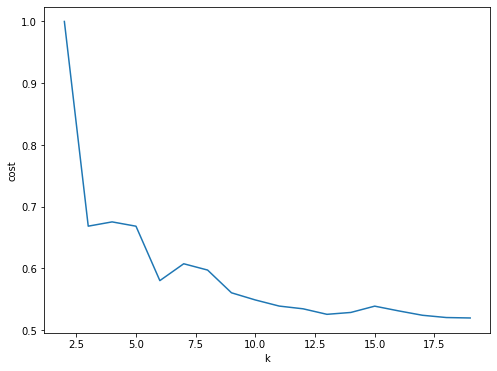

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler

# Loads data.
res_8 = df_opt1.select(['IncidntNum','X','Y'])

#Prepare features
FEATURES_COL = ['X', 'Y']
for col in res_8.columns:
    if col in FEATURES_COL:
        res_8 = res_8.withColumn(col,res_8[col].cast('float'))
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(res_8).select('IncidntNum', 'features')

#Optimize choice of k
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
    sample = df_kmeans.sample(False,0.1, seed=42)
    model = kmeans.fit(sample)
    predictions = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    cost[k] = silhouette
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')
display()
display(cost)